# Lab 4

### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist


In [2]:
from commonfunctions import *
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, rgba2rgb
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity
import math


def rgba2gray(img):
    return rgb2gray(rgba2rgb(img))


# Show the matlpotlib figures inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
from skimage.color import rgb2gray
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline


def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


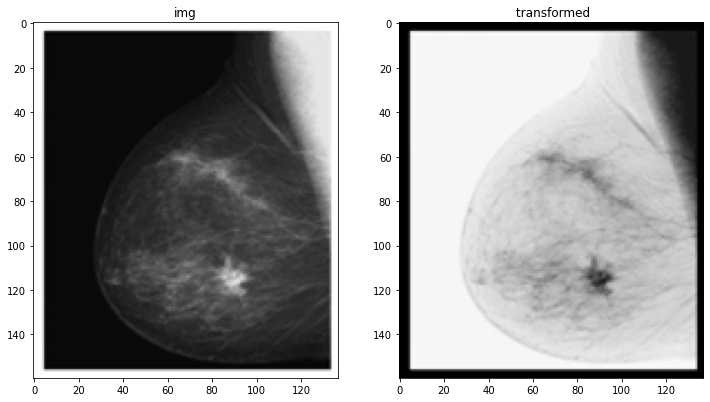

In [4]:
'''
1
Negative Transformation
'''


def negative_transform(img):
    return 255 - img


img = rgba2gray(io.imread('./imgs/Picture1.png'))
# print(img)
transformed = negative_transform(img)
# print(transformed)
show_images([img, transformed], ['img', ' transformed'])


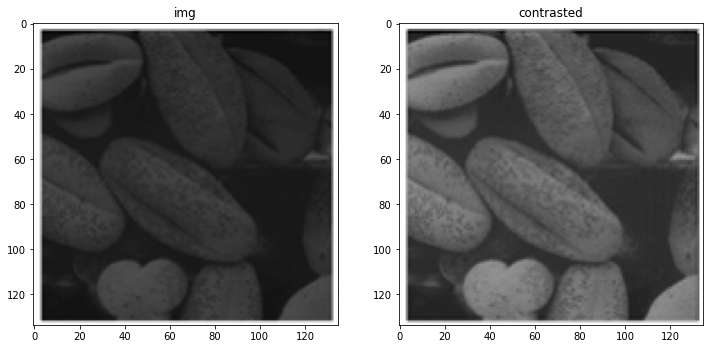

In [5]:
'''
2
Contrast Enhancement
'''
'''
mn => 0
mx => 255
ax + b = y
a*mx + b = 1
a*mn + b = 0

b = -a*mn
a*mx - a*mn = 1
a (mx - mn) = 1
a = 1 / (mx - mn)
b = - a * mn
'''


def contrast_enhancement(img):
    img2 = np.copy(img)
    mn = np.min(img2)
    mx = np.max(img2)
    if mx == mn:
        return img2
    a = 1 / (mx - mn)
    b = -a * mn
    img2 = a * img2 + b
    enhancement_cells = np.logical_and(img2 >= 0, img2 <= 100/255)
    img2[enhancement_cells] = img2[enhancement_cells] * 1.5 + (50 / 255)
    return img2


img = rgba2gray(io.imread('./imgs/Picture2.png'))
contrasted = contrast_enhancement(img)
show_images([img, contrasted], ['img', 'contrasted'])


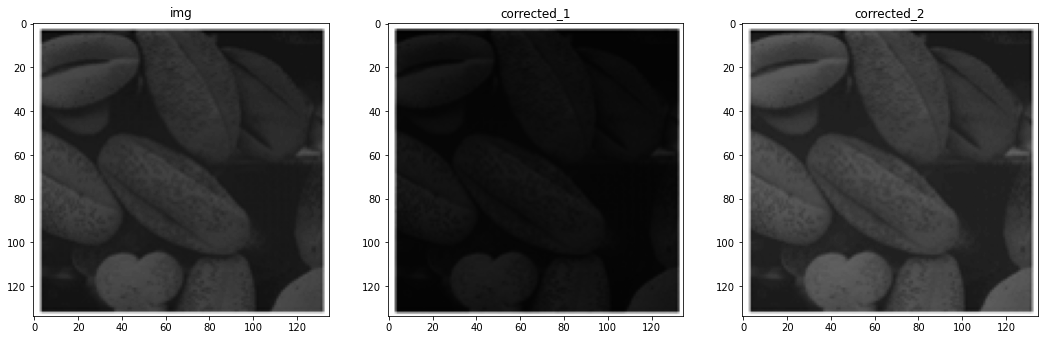

In [6]:
'''
3
Gamma Correction
'''


def gamma_correction(img, c, lm):
    return c * (np.array(img) ** lm)


img = rgba2gray(io.imread('./imgs/Picture2.png'))
corrected_1 = gamma_correction(img, 1, 3)
corrected_2 = gamma_correction(img, 1, 0.5)
show_images([img, corrected_1, corrected_2], [
            'img', 'corrected_1', 'corrected_2'])


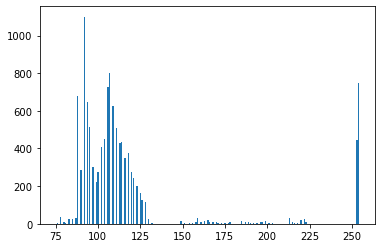

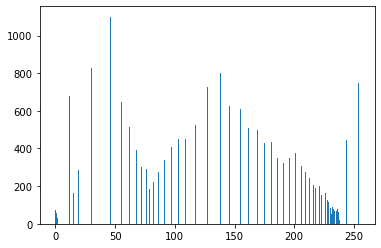

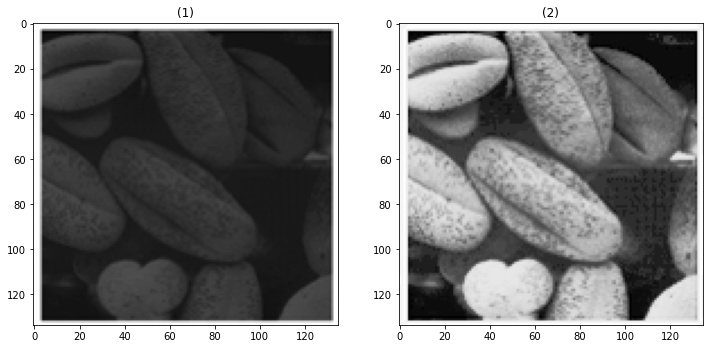

In [7]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''



def getAccArray(img):
    histogram_array = np.bincount(img.flatten().astype(int), minlength=256)
    # print(histogram_array)
    # return histogram_array
    hist_acc=  np.cumsum(histogram_array, dtype=int)
    return hist_acc


def getImageWithHist(name, ext, nbins=256):
    img = np.floor(255 * rgba2gray(io.imread('./imgs/Picture2.png')))
    acc_hist = getAccArray(img)
    G = 256
    N, M = img.shape
    def f(x): return (G-1) * acc_hist[int(x)] / (N*M)
    resImg = np.copy(img)
    showHist(img)
    for i in np.arange(N):
        for j in np.arange(M):
            # print(img[i][j])
            resImg[i][j] = f(img[i][j])
    showHist(resImg)
    return resImg


show_images([img , getImageWithHist('./imgs/Picture2.png', None)])
